In [2]:

with open('/home/project/Desktop/shashank/English HTR/output/bentham/shashankbest4senetgateddropouttwo/2023-08-23 15:46:14.721266/predict.txt') as f1:
    lines = f1.readlines()

'''
for i, line in enumerate(lines):
    lines[i] = line.split(" ", 1)[1]
    
    
with open('new_predict','w') as f2:
    for i in lines:
        f2.write("%s\n" % i)
    f2.close()
'''    
# open prediction file in read mode
fn = open('/home/project/Desktop/shashank/English HTR/output/bentham/shashankbest4senetgateddropouttwo/2023-08-23 15:46:14.721266/predict.txt', 'r')
  
# create list to store predicted text & GT
p=[]
g=[]
# read the content of the file line by line
cont = fn.readlines()
type(cont)
for i in range(0, len(cont)):
    if(i % 2 != 0):
        p.append(cont[i])
    else:
        g.append(cont[i])


In [3]:
g[134]

'TE_L particulars have concurred, in that case Justice cannot\n'

In [4]:
for i, line in enumerate(g):
    print(i)
    split_result = line.split(" ", 1)
    if len(split_result) > 1:
        g[i] = split_result[1]

for i, line in enumerate(p):
    split_result = line.split(" ", 1)
    if len(split_result) > 1:
        p[i] = split_result[1]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
'''
#remove TE_L & TE_P
for i, line in enumerate(g):
    print(i)
    g[i] = line.split(" ", 1)[1]
for i, line in enumerate(p):
    p[i] = line.split(" ", 1)[1]
'''

'\n#remove TE_L & TE_P\nfor i, line in enumerate(g):\n    print(i)\n    g[i] = line.split(" ", 1)[1]\nfor i, line in enumerate(p):\n    p[i] = line.split(" ", 1)[1]\n'

In [6]:
#remove \n inserted at last
g = [x[:-1] for x in g]
p = [x[:-1] for x in p]

In [7]:
p

['bran .',
 'Fromthis review then it appears that',
 'im poing hewag to the compderalin g',
 'omunivenpalLaw , our Author bas s pent',
 'suppocd',
 'nuek time in ex pluining he pature &',
 'Pwprerties orf Lavs whih do notexist : ',
 'in misappljing those whah do : & therefore ,',
 'pat pe best theng whivch aStudenl of te',
 'Law co-do is to forxct ale pal ouvlatbor',
 'hos buthertoadvanced .',
 '20 53',
 'Moti Cb p ',
 'otgony re Prith wales 20 Bas 1799',
 'The fatigue to which the Governor of this Ferritory muft',
 'subnitt both mental and corporeal , is far beyond any idea-',
 'you can have of the nature of his duty rendering sugch fatigue',
 'necessary in the Commander in chief .',
 'My former knowledge and acquaintance with this Country',
 'encouraged me in a hope , which however has in Pome respects',
 'proved delusive : that I should , with ease to mysllf, and with',
 'proper effect and advantage to the public , have fbeen able to',
 'hot',
 'manage all the duties of my offic . _

In [8]:
#alg4() for calculating matrix

import string
import numpy as np
sub = dict.fromkeys(string.printable[:95], 0)
ins = dict.fromkeys(string.printable[:95], 0)
delete = dict.fromkeys(string.printable[:95], 0)
array=np.zeros(shape=(len(string.printable[:95]), len(string.printable[:95])),dtype=int)



def alg4(word1,word2):
  M=[[float('inf')]*(len(word2)+1) for i in range(len(word1)+1)]
          
  #filling last row
  for i in range(len(word2)+1):
    M[len(word1)][i]=len(word2)-i
          
  #filling last column
  for j in range(len(word1)+1):
    M[j][len(word2)]=len(word1)-j
              
  #filling bottom to up manner
          
  for i in range(len(word1)-1,-1,-1):
    for j in range(len(word2)-1,-1,-1):
      if word1[i]==word2[j]:
        M[i][j]=M[i+1][j+1]
      else:
        M[i][j]=1+min(M[i+1][j],M[i][j+1],M[i+1][j+1])

  x,y=0,0
  #print(x,y)
  count=0
  while x<len(M)-1 and y<len(M[0])-1:
    current=M[x][y]
    dia=M[x+1][y+1]
    right=M[x][y+1]
    bottom=M[x+1][y]
    if dia<=right and dia<=bottom and dia<=current:
      if dia==current-1:
        print("Substitution-->",word1[x],"replaced by",word2[y])
        array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]=array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]+1
        sub[word1[x]]=sub[word1[x]]+1
        count=count+1
        x=x+1
        y=y+1
      else:
        print("No operation-->",word1[x])
        array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]=array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]+1
        x=x+1
        y=y+1
      
    elif right<=bottom and right<=current:
      print("Insertion",word2[y])
      ins[word2[y]]=ins[word2[y]]+1

      count=count+1
      y=y+1
    else:
      print("Deletion",word1[x])
      delete[word1[x]]=delete[word1[x]]+1
      x=x+1
      count=count+1
  print("total operations",count)


In [9]:
g

['brain.',
 'From this review then it appears, that',
 'in paving the way to the consideration of',
 'municipal Law, our Author has spent',
 'supposed',
 'much time in explaining the nature &',
 'Properties of Laws which do not exist &',
 'in misapplying those which do: & therefore,',
 'that the best thing which a Student of the',
 'Law can do is to forget all that our Author',
 'has hitherto advanced.',
 '25 73',
 'Note ( ) to p.',
 'Sydney New South Wales 20th May 1799',
 'The fatigue to which the Governor of this territory must',
 'submitt, both mental and corporeal, is far beyond any idea',
 'you can have of the nature of his duty rendering such fatigue',
 'necessary in the Commander in Chief.',
 'My former knowledge and acquaintance with this Country',
 'encouraged me in a hope, which however has in some respects',
 'proved delusive: that I should with ease to myself and with',
 'proper effect and advantage to the public, have been able to',
 'not',
 'manage all the duties of my o

In [10]:
#evaluate    
from data import evaluation

evaluate = evaluation.ocr_metrics(p, g)

print(evaluate)
'''
original
Character Error Rate: 0.06828555
Word Error Rate:      0.22346031
Sequence Error Rate:  0.81407845
'''

[0.08316011 0.34646615 0.82804878]


'\noriginal\nCharacter Error Rate: 0.06828555\nWord Error Rate:      0.22346031\nSequence Error Rate:  0.81407845\n'

In [11]:
import string       
for pred_text, gt_text in zip(p, g):        
	seq2 = pred_text
	seq1 = gt_text
	print("pred text:",seq2)
	print("ground truth:",seq1)
	#seq1=seq1.translate({ord(c): None for c in string.whitespace})

	#seq2=seq2.translate({ord(c): None for c in string.whitespace})
	#seq1=remove1(seq1)
	#seq2=remove1(seq2)
	#print("pred text2:",seq2)
	#print("ground truth2:",seq1)
	alg4(seq1,seq2)
 
print(ins)
print(delete)
print(sub)

pred text: bran .
ground truth: brain.
No operation--> b
No operation--> r
No operation--> a
Substitution--> i replaced by n
Substitution--> n replaced by  
No operation--> .
total operations 2
pred text: Fromthis review then it appears that
ground truth: From this review then it appears, that
No operation--> F
No operation--> r
No operation--> o
No operation--> m
Deletion  
No operation--> t
No operation--> h
No operation--> i
No operation--> s
No operation-->  
No operation--> r
No operation--> e
No operation--> v
No operation--> i
No operation--> e
No operation--> w
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation--> n
No operation-->  
No operation--> i
No operation--> t
No operation-->  
No operation--> a
No operation--> p
No operation--> p
No operation--> e
No operation--> a
No operation--> r
No operation--> s
Deletion ,
No operation-->  
No operation--> t
No operation--> h
No operation--> a
No operation--> t
total operations 2
pred text: im po

No operation--> 0
Insertion  
No operation--> .
No operation-->  
No operation--> T
No operation--> h
No operation--> e
No operation-->  
No operation--> P
No operation--> r
No operation--> i
No operation--> s
No operation--> o
No operation--> n
No operation-->  
No operation--> s
No operation--> h
No operation--> a
No operation--> l
No operation--> l
No operation-->  
No operation--> a
No operation--> t
No operation-->  
No operation--> a
No operation--> l
No operation--> l
No operation-->  
No operation--> p
No operation--> r
No operation--> o
No operation--> p
No operation--> e
No operation--> r
No operation-->  
No operation--> s
No operation--> e
No operation--> a
No operation--> s
No operation--> o
No operation--> n
No operation--> s
total operations 2
pred text: and in every part thereof be sufficiently warmed &
ground truth: and in ever part thereof be sufficiently warmed &
No operation--> a
No operation--> n
No operation--> d
No operation-->  
No operation--> i
No operation-->

KeyError: '£'

<AxesSubplot:>

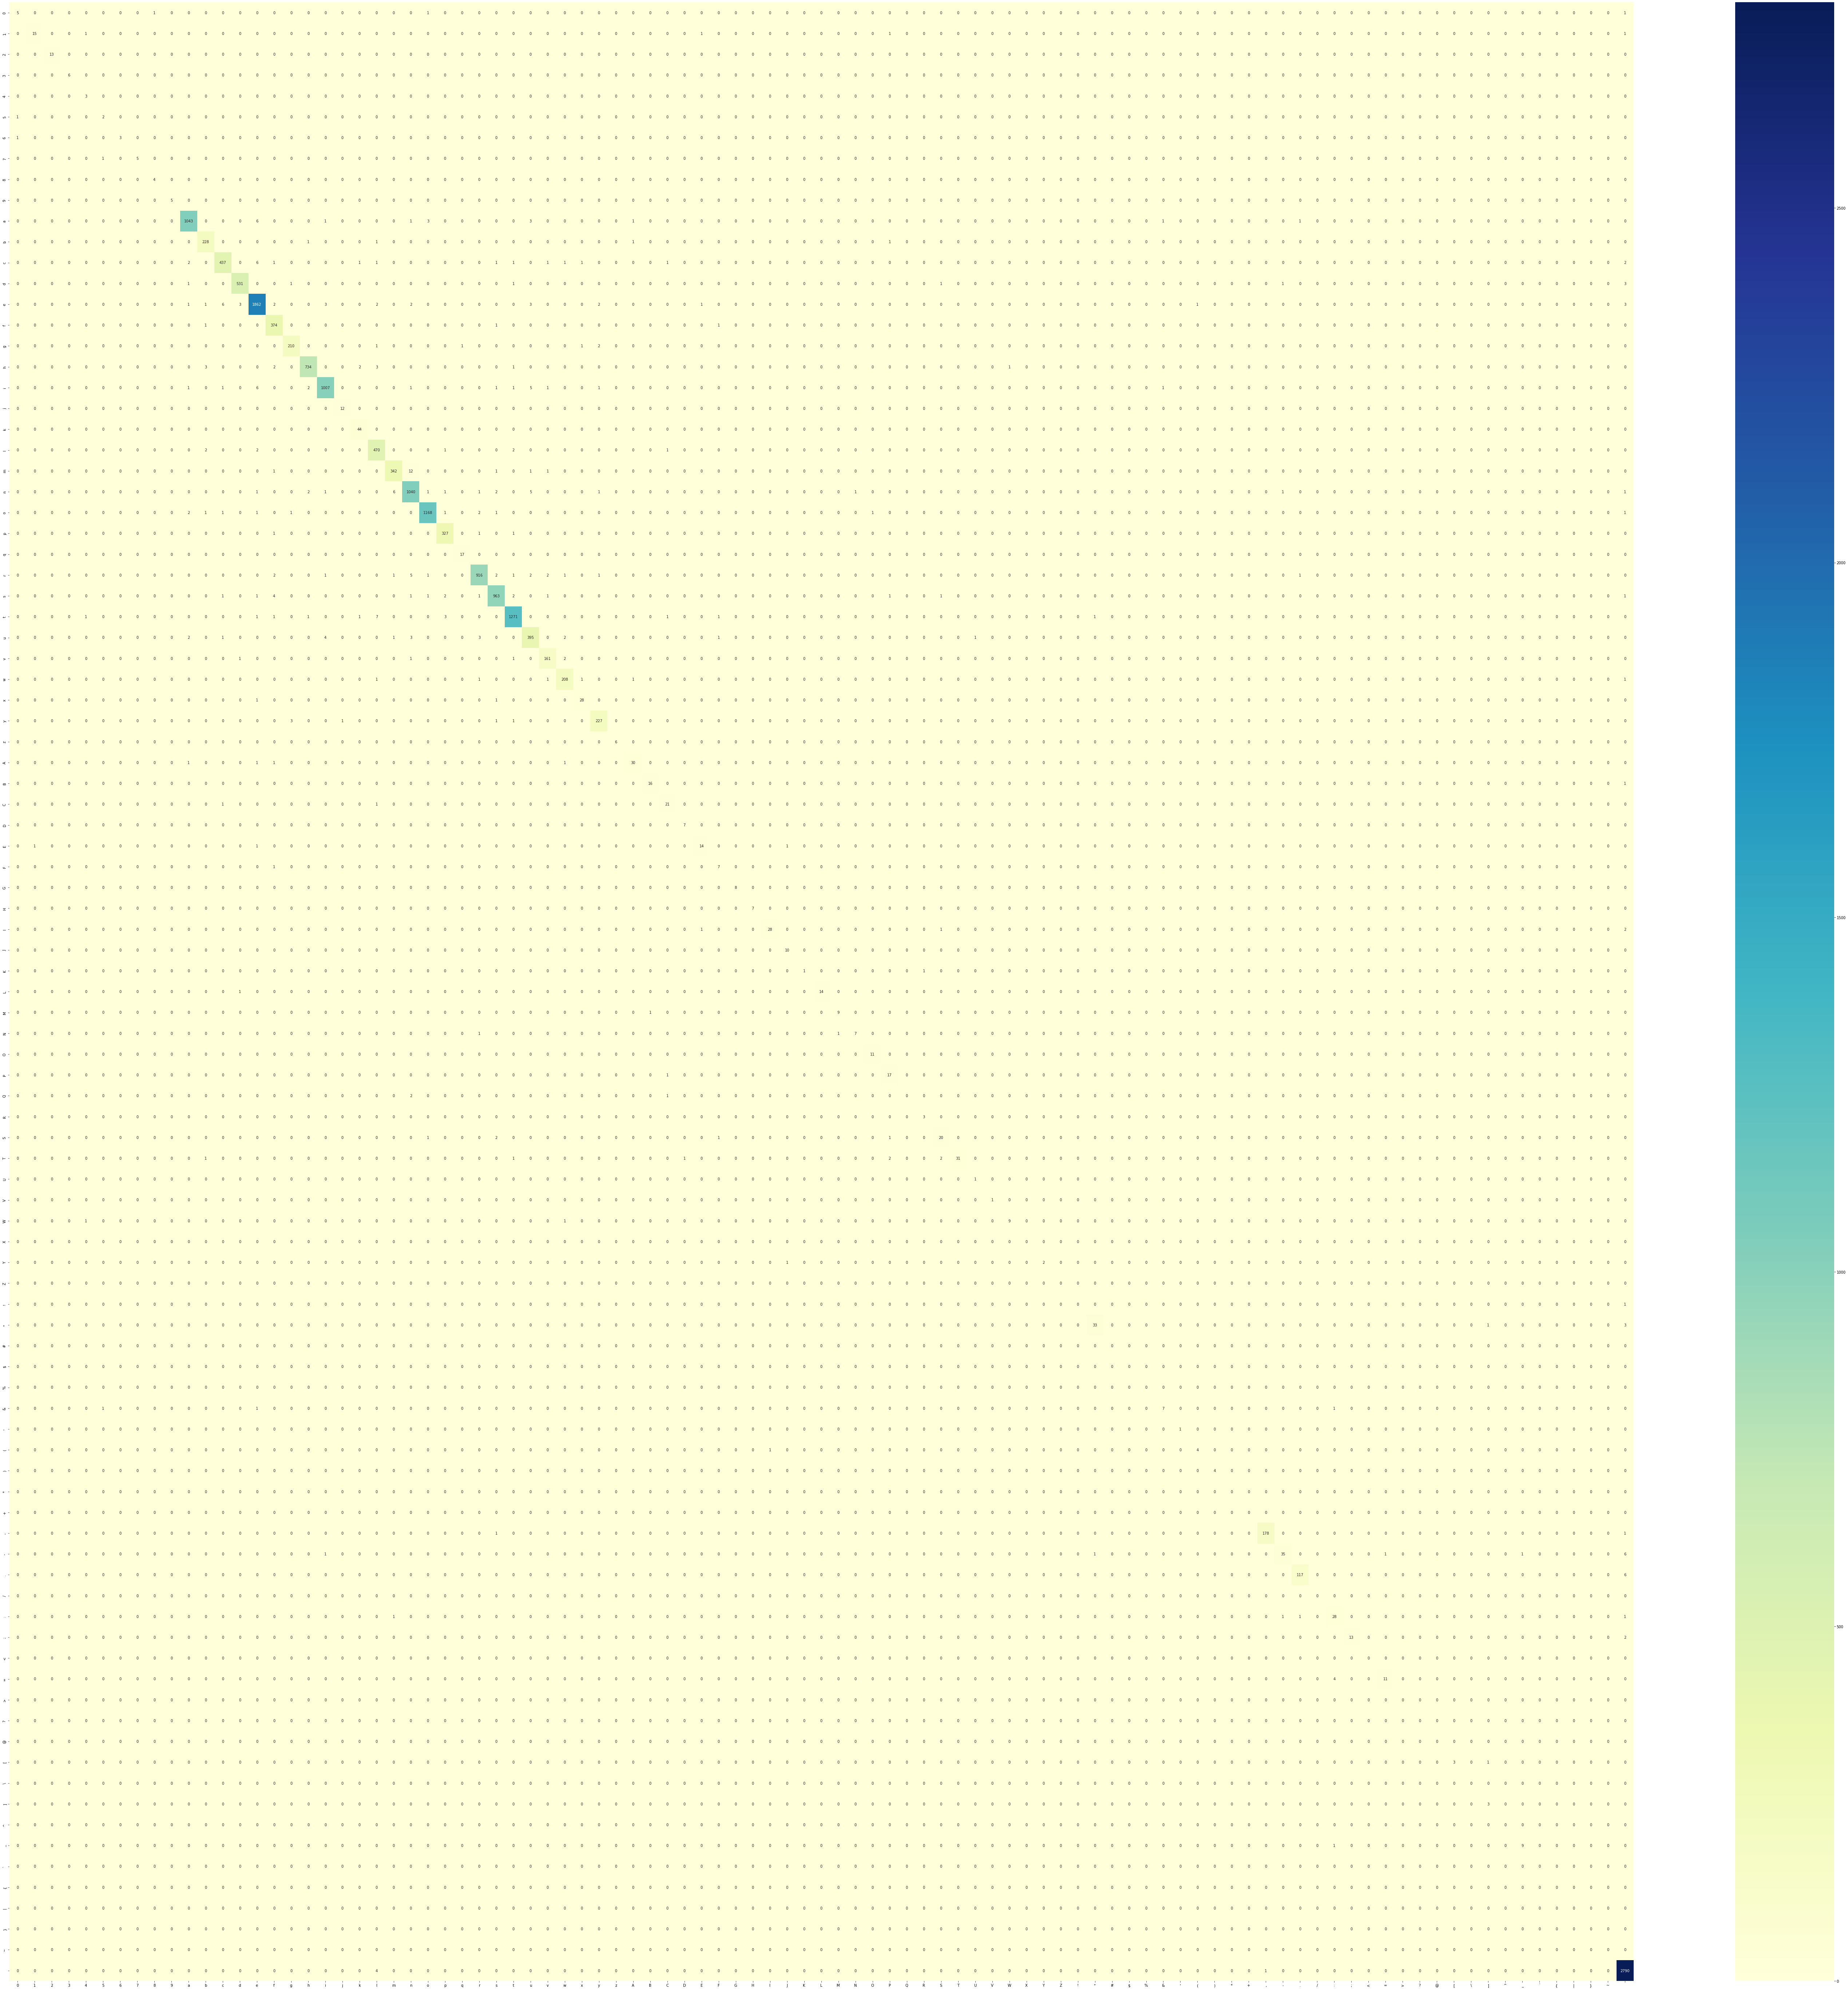

In [12]:
new=array
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
'''
plt.figure(figsize = (100,100))
#new=new.pivot(string.printable[10:62])
df_cm = pd.DataFrame(new, index = [i for i in string.printable[0:95]],
                  columns = [i for i in string.printable[0:95]])
ax = sn.heatmap(new, annot=True, fmt="d",cmap="YlGnBu",robust=True)
'''



import pandas as pd

df_cm = pd.DataFrame(array, index = [i for i in string.printable[0:95]],
                  columns = [i for i in string.printable[0:95]])
plt.figure(figsize = (100,100))
sn.heatmap(df_cm, annot=True,fmt="d",cmap="YlGnBu")

In [13]:
ins

{'0': 0,
 '1': 1,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 'a': 2,
 'b': 1,
 'c': 5,
 'd': 0,
 'e': 8,
 'f': 12,
 'g': 2,
 'h': 0,
 'i': 2,
 'j': 0,
 'k': 0,
 'l': 5,
 'm': 0,
 'n': 3,
 'o': 5,
 'p': 1,
 'q': 0,
 'r': 8,
 's': 5,
 't': 5,
 'u': 2,
 'v': 2,
 'w': 2,
 'x': 3,
 'y': 1,
 'z': 0,
 'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 1,
 'I': 0,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 0,
 'O': 1,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 0,
 'T': 0,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 0,
 'Y': 0,
 'Z': 0,
 '!': 0,
 '"': 4,
 '#': 0,
 '$': 0,
 '%': 0,
 '&': 1,
 "'": 0,
 '(': 1,
 ')': 2,
 '*': 0,
 '+': 0,
 ',': 8,
 '-': 1,
 '.': 6,
 '/': 0,
 ':': 6,
 ';': 0,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 1,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 2,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 382}

In [14]:
sub

{'0': 3,
 '1': 4,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 1,
 '6': 1,
 '7': 1,
 '8': 0,
 '9': 0,
 'a': 17,
 'b': 4,
 'c': 19,
 'd': 8,
 'e': 30,
 'f': 3,
 'g': 5,
 'h': 12,
 'i': 21,
 'j': 0,
 'k': 0,
 'l': 8,
 'm': 16,
 'n': 24,
 'o': 12,
 'p': 3,
 'q': 0,
 'r': 20,
 's': 17,
 't': 18,
 'u': 18,
 'v': 5,
 'w': 6,
 'x': 2,
 'y': 6,
 'z': 0,
 'A': 4,
 'B': 1,
 'C': 2,
 'D': 0,
 'E': 3,
 'F': 1,
 'G': 0,
 'H': 0,
 'I': 4,
 'J': 0,
 'K': 1,
 'L': 1,
 'M': 1,
 'N': 2,
 'O': 0,
 'P': 1,
 'Q': 3,
 'R': 0,
 'S': 5,
 'T': 7,
 'U': 0,
 'V': 0,
 'W': 2,
 'X': 0,
 'Y': 1,
 'Z': 0,
 '!': 1,
 '"': 4,
 '#': 0,
 '$': 0,
 '%': 0,
 '&': 3,
 "'": 0,
 '(': 1,
 ')': 0,
 '*': 0,
 '+': 0,
 ',': 2,
 '-': 10,
 '.': 6,
 '/': 0,
 ':': 4,
 ';': 2,
 '<': 0,
 '=': 4,
 '>': 0,
 '?': 0,
 '@': 0,
 '[': 1,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 1,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 5}

In [15]:
delete

{'0': 0,
 '1': 2,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 'a': 2,
 'b': 2,
 'c': 9,
 'd': 6,
 'e': 21,
 'f': 2,
 'g': 1,
 'h': 8,
 'i': 7,
 'j': 0,
 'k': 0,
 'l': 1,
 'm': 2,
 'n': 6,
 'o': 9,
 'p': 2,
 'q': 0,
 'r': 6,
 's': 9,
 't': 8,
 'u': 6,
 'v': 2,
 'w': 1,
 'x': 0,
 'y': 0,
 'z': 0,
 'A': 0,
 'B': 0,
 'C': 1,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 0,
 'I': 2,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 0,
 'O': 0,
 'P': 0,
 'Q': 3,
 'R': 0,
 'S': 0,
 'T': 1,
 'U': 0,
 'V': 0,
 'W': 0,
 'X': 0,
 'Y': 0,
 'Z': 0,
 '!': 0,
 '"': 4,
 '#': 0,
 '$': 0,
 '%': 0,
 '&': 1,
 "'": 1,
 '(': 1,
 ')': 2,
 '*': 0,
 '+': 1,
 ',': 7,
 '-': 6,
 '.': 10,
 '/': 0,
 ':': 3,
 ';': 0,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 0,
 '@': 0,
 '[': 2,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 32}

In [16]:
    
    
    
    
 #evaluation metrics added
 
  
    
# Copyright (c) OpenMMLab. All rights reserved.
import re
from difflib import SequenceMatcher

from rapidfuzz import string_metric


def cal_true_positive_char(pred, gt):
  all_opt = SequenceMatcher(None, pred, gt)
  true_positive_char_num = 0
  for opt, _, _, s2, e2 in all_opt.get_opcodes():
        if opt == 'equal':
          true_positive_char_num += (e2 - s2)
        else:
          pass
  return true_positive_char_num


def count_matches(pred_texts, gt_texts):
    match_res = {
        'gt_char_num': 0,
        'pred_char_num': 0,
        'true_positive_char_num': 0,
        'gt_word_num': 0,
        'match_word_num': 0,
        'match_word_ignore_case': 0,
        'match_word_ignore_case_symbol': 0
    }
    comp = re.compile('[^A-Z^a-z^0-9^\u4e00-\u9fa5]')
    norm_ed_sum = 0.0
    for pred_text, gt_text in zip(pred_texts, gt_texts):
        if gt_text == pred_text:
            match_res['match_word_num'] += 1
        gt_text_lower = gt_text.lower()
        pred_text_lower = pred_text.lower()
        if gt_text_lower == pred_text_lower:
            match_res['match_word_ignore_case'] += 1
        gt_text_lower_ignore = comp.sub('', gt_text_lower)
        pred_text_lower_ignore = comp.sub('', pred_text_lower)
        if gt_text_lower_ignore == pred_text_lower_ignore:
            match_res['match_word_ignore_case_symbol'] += 1
        match_res['gt_word_num'] += 1

        # normalized edit distance
        edit_dist = string_metric.levenshtein(pred_text_lower_ignore,
                                              gt_text_lower_ignore)
        norm_ed = float(edit_dist) / max(1, len(gt_text_lower_ignore),
                                         len(pred_text_lower_ignore))
        norm_ed_sum += norm_ed

        # number to calculate char level recall & precision
        match_res['gt_char_num'] += len(gt_text_lower_ignore)
        match_res['pred_char_num'] += len(pred_text_lower_ignore)
        true_positive_char_num = cal_true_positive_char(
            pred_text_lower_ignore, gt_text_lower_ignore)
        match_res['true_positive_char_num'] += true_positive_char_num

    normalized_edit_distance = norm_ed_sum / max(1, len(gt_texts))
    match_res['ned'] = normalized_edit_distance

    return match_res


def eval_ocr_metric(pred_texts, gt_texts):
    """Evaluate the text recognition performance with metric: word accuracy and
    1-N.E.D. See https://rrc.cvc.uab.es/?ch=14&com=tasks for details.

    Args:
        pred_texts (list[str]): Text strings of prediction.
        gt_texts (list[str]): Text strings of ground truth.

    Returns:
        eval_res (dict[str: float]): Metric dict for text recognition, include:
            - word_acc: Accuracy in word level.
            - word_acc_ignore_case: Accuracy in word level, ignore letter case.
            - word_acc_ignore_case_symbol: Accuracy in word level, ignore
                letter case and symbol. (default metric for
                academic evaluation)
            - char_recall: Recall in character level, ignore
                letter case and symbol.
            - char_precision: Precision in character level, ignore
                letter case and symbol.
            - 1-N.E.D: 1 - normalized_edit_distance.
    """
    assert isinstance(pred_texts, list)
    assert isinstance(gt_texts, list)
    assert len(pred_texts) == len(gt_texts)

    match_res = count_matches(pred_texts, gt_texts)
    eps = 1e-8
    char_recall = 1.0 * match_res['true_positive_char_num'] / (
        eps + match_res['gt_char_num'])
    char_precision = 1.0 * match_res['true_positive_char_num'] / (
        eps + match_res['pred_char_num'])
    word_acc = 1.0 * match_res['match_word_num'] / (
        eps + match_res['gt_word_num'])
    word_acc_ignore_case = 1.0 * match_res['match_word_ignore_case'] / (
        eps + match_res['gt_word_num'])
    word_acc_ignore_case_symbol = 1.0 * match_res[
        'match_word_ignore_case_symbol'] / (
            eps + match_res['gt_word_num'])

    eval_res = {}
    eval_res['word_acc'] = word_acc
    eval_res['word_acc_ignore_case'] = word_acc_ignore_case
    eval_res['word_acc_ignore_case_symbol'] = word_acc_ignore_case_symbol
    eval_res['char_recall'] = char_recall
    eval_res['char_precision'] = char_precision
    eval_res['1-N.E.D'] = 1.0 - match_res['ned']

    for key, value in eval_res.items():
        eval_res[key] = float('{:.4f}'.format(value))
    print("predicted text:",pred_texts)
    return eval_res
    print(e_corpus)
    
    
    
evaluate1 = count_matches(p, g) 

print("\neval1=",evaluate1)



eval1= {'gt_char_num': 31187, 'pred_char_num': 31037, 'true_positive_char_num': 30290, 'gt_word_num': 820, 'match_word_num': 139, 'match_word_ignore_case': 141, 'match_word_ignore_case_symbol': 432, 'ned': 0.05718259072313452}


In [17]:
sorted_ins = dict(sorted(ins.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_ins.items():
    print(f"'{char}': {count}")

' ': 382
'f': 12
'e': 8
'r': 8
',': 8
'.': 6
':': 6
'c': 5
'l': 5
'o': 5
's': 5
't': 5
'"': 4
'n': 3
'x': 3
'a': 2
'g': 2
'i': 2
'u': 2
'v': 2
'w': 2
')': 2
']': 2
'1': 1
'b': 1
'p': 1
'y': 1
'H': 1
'O': 1
'&': 1
'(': 1
'-': 1
'?': 1
'0': 0
'2': 0
'3': 0
'4': 0
'5': 0
'6': 0
'7': 0
'8': 0
'9': 0
'd': 0
'h': 0
'j': 0
'k': 0
'm': 0
'q': 0
'z': 0
'A': 0
'B': 0
'C': 0
'D': 0
'E': 0
'F': 0
'G': 0
'I': 0
'J': 0
'K': 0
'L': 0
'M': 0
'N': 0
'P': 0
'Q': 0
'R': 0
'S': 0
'T': 0
'U': 0
'V': 0
'W': 0
'X': 0
'Y': 0
'Z': 0
'!': 0
'#': 0
'$': 0
'%': 0
''': 0
'*': 0
'+': 0
'/': 0
';': 0
'<': 0
'=': 0
'>': 0
'@': 0
'[': 0
'\': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


In [18]:
sorted_sub = dict(sorted(sub.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_sub.items():
    print(f"'{char}': {count}")

'e': 30
'n': 24
'i': 21
'r': 20
'c': 19
't': 18
'u': 18
'a': 17
's': 17
'm': 16
'h': 12
'o': 12
'-': 10
'd': 8
'l': 8
'T': 7
'w': 6
'y': 6
'.': 6
'g': 5
'v': 5
'S': 5
' ': 5
'1': 4
'b': 4
'A': 4
'I': 4
'"': 4
':': 4
'=': 4
'0': 3
'f': 3
'p': 3
'E': 3
'Q': 3
'&': 3
'x': 2
'C': 2
'N': 2
'W': 2
',': 2
';': 2
'5': 1
'6': 1
'7': 1
'B': 1
'F': 1
'K': 1
'L': 1
'M': 1
'P': 1
'Y': 1
'!': 1
'(': 1
'[': 1
'_': 1
'2': 0
'3': 0
'4': 0
'8': 0
'9': 0
'j': 0
'k': 0
'q': 0
'z': 0
'D': 0
'G': 0
'H': 0
'J': 0
'O': 0
'R': 0
'U': 0
'V': 0
'X': 0
'Z': 0
'#': 0
'$': 0
'%': 0
''': 0
')': 0
'*': 0
'+': 0
'/': 0
'<': 0
'>': 0
'?': 0
'@': 0
'\': 0
']': 0
'^': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


In [19]:
sorted_delete = dict(sorted(delete.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_delete.items():
    print(f"'{char}': {count}")

' ': 32
'e': 21
'.': 10
'c': 9
'o': 9
's': 9
'h': 8
't': 8
'i': 7
',': 7
'd': 6
'n': 6
'r': 6
'u': 6
'-': 6
'"': 4
'Q': 3
':': 3
'1': 2
'a': 2
'b': 2
'f': 2
'm': 2
'p': 2
'v': 2
'I': 2
')': 2
'[': 2
'g': 1
'l': 1
'w': 1
'C': 1
'T': 1
'&': 1
''': 1
'(': 1
'+': 1
'0': 0
'2': 0
'3': 0
'4': 0
'5': 0
'6': 0
'7': 0
'8': 0
'9': 0
'j': 0
'k': 0
'q': 0
'x': 0
'y': 0
'z': 0
'A': 0
'B': 0
'D': 0
'E': 0
'F': 0
'G': 0
'H': 0
'J': 0
'K': 0
'L': 0
'M': 0
'N': 0
'O': 0
'P': 0
'R': 0
'S': 0
'U': 0
'V': 0
'W': 0
'X': 0
'Y': 0
'Z': 0
'!': 0
'#': 0
'$': 0
'%': 0
'*': 0
'/': 0
';': 0
'<': 0
'=': 0
'>': 0
'?': 0
'@': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0
